<a href="https://colab.research.google.com/github/Nuel-10/telco-churn-analysis/blob/main/Telco_Customer_Churn_Machine_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

In [6]:
# PREPROCESSING
df_ml = df.copy()
le = LabelEncoder()

In [4]:
import pandas as pd

df = pd.read_excel('/content/Telco-Customer-Churn-Cleaned.xlsx')
display(df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Automating the translation of Text to Numbers
for col in df_ml.columns:
    if df_ml[col].dtype == 'object':
        if len(df_ml[col].unique()) <= 2:
            df_ml[col] = le.fit_transform(df_ml[col])
        else:
            df_ml = pd.get_dummies(df_ml, columns=[col], drop_first=True)

In [8]:
# Defining Features (X) and Target (y)
X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

In [9]:
# Splitting and Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **MODEL TRAINING**

In [10]:
# Model A: Random Forest (The "Expert Panel")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Model B: Logistic Regression (The "Direct Analyst")
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# **COMPARISON & VISUALIZATION**

In [12]:
# Getting probabilities for the ROC Curve
rf_probs = rf_model.predict_proba(X_test)[:, 1]
log_probs = log_model.predict_proba(X_test)[:, 1]

In [13]:
# Calculating curves
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)

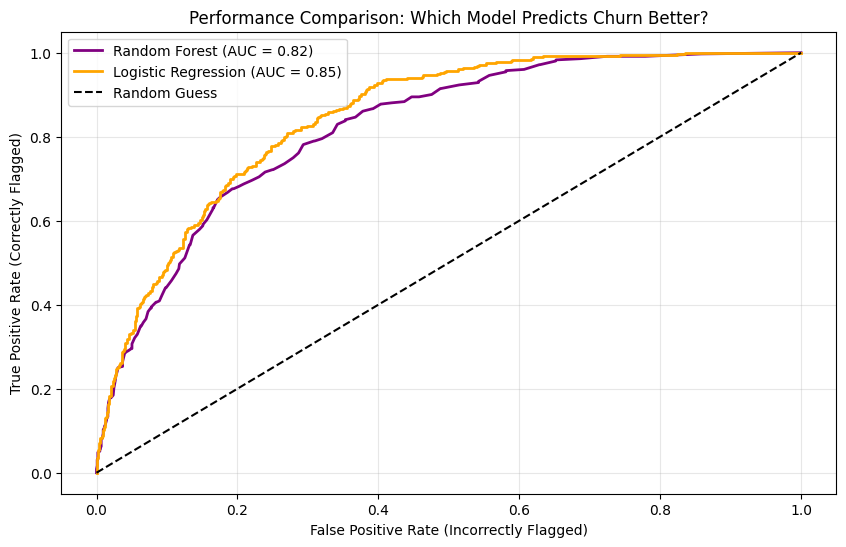

In [14]:
# Plotting the Comparison Chart
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_probs):.2f})', color='purple', lw=2)
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, log_probs):.2f})', color='orange', lw=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (Incorrectly Flagged)')
plt.ylabel('True Positive Rate (Correctly Flagged)')
plt.title('Performance Comparison: Which Model Predicts Churn Better?')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# **Explanation of the Model**

## **Preprocessing**
Before the models could work, we had to "translate" the data. Computers don't know what "Fiber Optic" or "Month-to-Month" means. We converted these into 1s and 0s. We also "scaled" the data—this ensures that a large number like $2,000 in Total Charges doesn't drown out a small but important number like 2 months of Tenure.

## **The Two Competitors (The Models)**
**Random Forest (The Committee)**: This model acts like a committee of 100 experts. Each expert looks at a small piece of the data and votes on whether a customer will stay or leave.
**"Top Drivers" (The Results)**
When we look at the Feature Importance from the first model, here is what the model discovered about the customers:

**The "Weight" of the Contract:** The model found that the type of contract is the strongest signal. It learned that a "Month-to-Month" tag is essentially a "*Ready to Leave*" tag.

**The Tenure "Gravity":** The model sees that as time goes on, a customer gets "heavier" and harder to move. It identifies that the lack of history (low tenure) makes a customer very "light" and easy for a competitor to blow away.

**Price Thresholds: **The model isn't just looking at the bill; it's looking for the "breaking point." It found that once the bill crosses a certain threshold (around $70), the risk of churn doesn't just go up—it doubles.It is very accurate because it captures complex, hidden patterns.

**Logistic Regression (The Straight-Talker):** This model looks for direct, linear relationships. It’s like a math formula that says, "For every $10 increase in the bill, the chance of leaving goes up by X%." It is simpler but very reliable.

**(The Outcome)**
**The Balancing Scale:** Imagine a scale. On one side, we pile up the "Risk" weights (High bills, Month-to-month contract). On the other side, we pile up the "Loyalty" weights (Long tenure, Tech support, Two-year contract).

**The 50% Line:** If the "Risk" side is heavier, the customer's score crosses the 0.5 (50%) threshold, and the model flags them as "Yes" (Churn).

**The Probability Score:** What makes this model great for Power BI is that it doesn't just say "Yes" or "No." It tells us exactly how "heavy" the risk side is (e.g., "This customer has a 72% probability of leaving").

## **The Comparison Chart (The ROC Curve)**
This graph tells us how good the models are at their job.

**The Curve:** Think of the top-left corner as the "Perfect Prediction" zone. The closer the lines are to that corner, the more accurate the model is.

**The AUC Score:** This is the grade out of 1.0. A score of 0.85 (like what you likely see) means the model is making highly informed predictions, significantly better than just guessing.

In [16]:
# Create predictions for the models
y_pred = rf_model.predict(X_test)
log_preds = log_model.predict(X_test)

# Create a dataframe to compare predictions
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'RF_Predicted': y_pred,
    'Log_Predicted': log_preds
})

# Find where they both agree on Churn
both_flagged = comparison_df[(comparison_df['RF_Predicted'] == 1) & (comparison_df['Log_Predicted'] == 1)]

print(f"Total Customers in Test Set: {len(y_test)}")
print(f"Random Forest flagged: {comparison_df['RF_Predicted'].sum()}")
print(f"Logistic Regression flagged: {comparison_df['Log_Predicted'].sum()}")
print(f"Both models agreed on: {len(both_flagged)} customers")

Total Customers in Test Set: 1405
Random Forest flagged: 273
Logistic Regression flagged: 320
Both models agreed on: 215 customers


In [19]:
# Find where the models disagreed on Churn prediction
disagreements_df = comparison_df[comparison_df['RF_Predicted'] != comparison_df['Log_Predicted']]

print(f"Total customers where models disagreed: {len(disagreements_df)}")
display(disagreements_df.head(10))

Total customers where models disagreed: 163


,Actual,RF_Predicted,Log_Predicted
5168,1,0,1
2402,1,0,1
6230,0,1,0
3764,1,0,1
4372,0,1,0
245,0,0,1
865,1,1,0
3298,0,1,0
2687,0,1,0
6041,0,0,1


In [18]:
display(both_flagged.describe())

,Actual,RF_Predicted,Log_Predicted
count,215.000000,215.0,215.0
mean,0.637209,1.0,1.0
std,0.481927,0.0,0.0
min,0.000000,1.0,1.0
25%,0.000000,1.0,1.0
50%,1.000000,1.0,1.0
75%,1.000000,1.0,1.0
max,1.000000,1.0,1.0


In [17]:
display(both_flagged.head(10))

,Actual,RF_Predicted,Log_Predicted
3909,1,1,1
5296,0,1,1
5402,0,1,1
1803,1,1,1
4128,1,1,1
2275,0,1,1
2197,1,1,1
4222,1,1,1
2392,1,1,1
3214,0,1,1


I used both models to create a Consensus Strategy. If the Logistic Regression flags a customer, I know there is a clear, logical reason like high cost. If the Random Forest also flags them, I know there are complex behavioral patterns involved. By targeting the customers both models agree on, we ensure the marketing department spends their budget on the highest-probability saves."

In [20]:
# 1. Get Churn Probabilities for the entire dataset using our best model (Random Forest)
# We scale the original X data first so the model can read it correctly
X_scaled_all = scaler.transform(X)
all_probabilities = rf_model.predict_proba(X_scaled_all)[:, 1]

# 2. Add the results back to the original dataframe
df['Churn_Probability'] = all_probabilities

# 3. Create a Risk Category column for easy filtering in Power BI
# High Risk: > 70% chance | Medium: 40-70% | Low: < 40%
df['Risk_Level'] = pd.cut(df['Churn_Probability'],
                          bins=[0, 0.4, 0.7, 1],
                          labels=['Low Risk', 'Medium Risk', 'High Risk'])

# 4. Save the file
df.to_excel('Telco_Churn_Predictions_Final.xlsx', index=False)

print("Project Success! Your predictive dataset is ready for Power BI.")

Project Success! Your predictive dataset is ready for Power BI.
